In [1]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
from stephenHeadConfig import conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py


import mpld3
mpld3.enable_notebook()

import multiResData
reload(multiResData)

multiResData.createDB(conf)

Creating val data /home/mayank/work/tensorflow/cacheHead/valdata!
Done 0 of 127 movies, count:3 val:0
Done 1 of 127 movies, count:3 val:3
Done 2 of 127 movies, count:3 val:5
Done 3 of 127 movies, count:5 val:5
Done 4 of 127 movies, count:7 val:5
Done 5 of 127 movies, count:9 val:5
Done 6 of 127 movies, count:12 val:5
Done 7 of 127 movies, count:15 val:5
Done 8 of 127 movies, count:18 val:5
Done 9 of 127 movies, count:21 val:5
Done 10 of 127 movies, count:24 val:5
Done 11 of 127 movies, count:27 val:5
Done 12 of 127 movies, count:27 val:8
Done 13 of 127 movies, count:30 val:8
Done 14 of 127 movies, count:33 val:8
Done 15 of 127 movies, count:36 val:8
Done 16 of 127 movies, count:36 val:10
Done 17 of 127 movies, count:39 val:10
Done 18 of 127 movies, count:42 val:10
Done 19 of 127 movies, count:42 val:13
Done 20 of 127 movies, count:42 val:16
Done 21 of 127 movies, count:42 val:19
Done 22 of 127 movies, count:44 val:19
Done 23 of 127 movies, count:46 val:19
Done 24 of 127 movies, count:4

In [4]:
# copy the validation file from front view to side view
import pickle
import os
import re

from stephenHeadConfig import conf
conforig = conf
from stephenHeadSideConfig import conf
outfile = os.path.join(conforig.cachedir,conforig.valdatafilename)
assert os.path.isfile(outfile),"valdatafile doesn't exist"

with open(outfile,'r') as f:
    isval,localdirs,seldirs = pickle.load(f)

newdirs = []    
for ndx,l in enumerate(localdirs):
    if ndx == 19:
        newdirs.append('/home/mayank/Dropbox/PoseEstimation/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0023/fly_0023_trial_005/C001H001S0002/C001H001S0002.avi')
    else:
        newdirs.append(re.sub('C002','C001',l,count = 3))
#     print('%d %d:%s' % (ndx,os.path.isfile(newdirs[-1]),newdirs[-1]))

outfile = os.path.join(conf.cachedir,conf.valdatafilename)

with open(outfile,'w') as f:
    pickle.dump([isval,newdirs,seldirs],f)
    


In [1]:
from stephenHeadSideConfig import conf
import multiResData
reload(multiResData)

multiResData.createDB(conf)

Done 0 of 127 movies, count:3 val:0
Done 1 of 127 movies, count:3 val:3
Done 2 of 127 movies, count:3 val:5
Done 3 of 127 movies, count:5 val:5
Done 4 of 127 movies, count:7 val:5
Done 5 of 127 movies, count:9 val:5
Done 6 of 127 movies, count:12 val:5
Done 7 of 127 movies, count:15 val:5
Done 8 of 127 movies, count:18 val:5
Done 9 of 127 movies, count:21 val:5
Done 10 of 127 movies, count:24 val:5
Done 11 of 127 movies, count:27 val:5
Done 12 of 127 movies, count:27 val:8
Done 13 of 127 movies, count:30 val:8
Done 14 of 127 movies, count:33 val:8
Done 15 of 127 movies, count:36 val:8
Done 16 of 127 movies, count:36 val:10
Done 17 of 127 movies, count:39 val:10
Done 18 of 127 movies, count:42 val:10
Done 19 of 127 movies, count:42 val:13
Done 20 of 127 movies, count:42 val:16
Done 21 of 127 movies, count:42 val:19
Done 22 of 127 movies, count:44 val:19
Done 23 of 127 movies, count:46 val:19
Done 24 of 127 movies, count:48 val:19
Done 25 of 127 movies, count:51 val:19
Done 26 of 127 mov

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf

pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
Loading base variables from /home/mayank/work/tensorflow/cacheHead/headBase-4000
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 4020, Train = 22.358,4.9, Val = 24.875,5.8
Iter 4050, Train = 17.910,4.4, Val = 27.512,5.7
Iter 4080, Train = 23.938,5.3, Val = 26.428,6.3
Iter 4110, Train = 18.922,4.8, Val = 26.940,6.1
Iter 4140, Train = 25.144,8.4, Val = 25.839,5.8
Iter 4170, Train = 31.608,10.8, Val = 26.722,6.3
Iter 4200, Train = 20.151,4.7, Val = 29.493,6.6
Iter 4230, Train = 18.094,4.2, Val = 25.424,5.6
Iter 4260, Train = 19.945,4.7, Val = 23.853,5.6
Iter 4290, Train = 21.303,5.7, Val = 24.442,5.5
Iter 4320, Train = 21.194,4.8, Val = 24.688,5.3
Iter 4350, Train = 27.568,6.3, Val = 26.338,5.6
Iter 4380, Train = 23.107,4.3, Val = 31.949

In [2]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf

pobj = PoseTrain.PoseTrain(sideconf)
pobj.baseTrain(restore=True)

ValueError: Variable base/scale0/layer1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope?

In [ ]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Loading base from /home/mayank/work/tensorflow/cacheHead/headBase-5000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 38.596,4.7, Val = 37.858,5.8 (22.7,27.5),(3.9,5.6)
Saved state to /home/mayank/work/tensorflow/cacheHead/headMRF-0
Iter 30, Train = 35.483,4.9, Val = 36.934,5.9 (22.3,29.2),(4.6,5.6)
Iter 60, Train = 30.644,4.3, Val = 36.515,6.1 (21.3,29.5),(4.2,6.2)
Iter 90, Train = 31.841,4.3, Val = 34.358,5.6 (20.5,28.0),(4.0,6.1)
Iter 120, Train = 29.812,4.2, Val = 34.468,5.5 (19.9,29.1),(4.0,5.7)
Iter 150, Train = 33.521,7.5, Val = 33.574,6.3 (27.8,29.2),(7.7,6.2)
Iter 180, Train = 28.380,4.7, Val = 33.645,6.2 (20.9,30.7),(4.4,6.0)
Iter 210, Train = 30.785,5.0, Val = 31.634,5.4 (23.2,28.3),(3.8,5.5)
Iter 240, T

In [ ]:
import PoseTrain
reload(PoseTrain)
import stephenHeadConfig as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.fineTrain(restore=False)

In [ ]:
ll = np.max(berr,1)

zz = np.argwhere(ll>15)
from matplotlib import cm
fig = plt.figure(figsize=(8,5))
for idx in range(zz.shape[0]):
    img = zz[idx,0]

    fig.clf()
    ax12 = fig.add_subplot(1,1,1)
    ax12.imshow(all_images[img][0,:,:,0],cmap=cm.gray)

    all_locs = np.zeros([5,3,2])
    for ondx in range(conf.n_classes):
        maxndx = np.argmax(basepred[img][0,:,:,ondx])
        predloc = np.array(np.unravel_index(maxndx,basepred[img].shape[1:3]))
        predloc = predloc * conf.pool_scale 
        all_locs[ondx,0,:] = predloc
        maxndx = np.argmax(mrfpred[img][0,:,:,ondx])
        mrfloc = np.array(np.unravel_index(maxndx,mrfpred[img].shape[1:3]))
        mrfloc = mrfloc * conf.pool_scale 
        all_locs[ondx,1,:] = predloc
        maxndx = np.argmax(finepred[img][0,:,:,ondx])
        finepredloc = (np.array(np.unravel_index(maxndx,finepred[img].shape[1:3]))-conf.fine_sz/2)
        all_locs[ondx,2,:]= predloc+finepredloc


    plt.scatter(labels[img][0,:,0]/conf.rescale,labels[img][0,:,1]/conf.rescale,
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,0,1],all_locs[:,0,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.2,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,2,1],all_locs[:,2,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.6,
                linewidths=0,edgecolors='face',s=5)
    outname = 'results/headBaseAndFine%d.png'%idx
#     plt.savefig(outname,dpi=500)
#     raw_input('Press Enter')


In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from stephenHeadConfig import conf as conf
from scipy import io


# conf = sideconf
# extrastr = '_side'
extrastr = ''
conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
batch_size doesnt match
useMRF doesnt match
Loading base variables from /home/mayank/work/tensorflow/cacheHead/headBase-5000


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/numpy-1.12.0.dev0+9cfdb21-py2.7-linux-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will return a copy of the mask. In the future, it will try to return both as views.
  FutureWarning
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


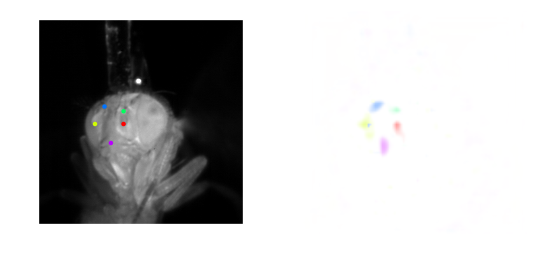

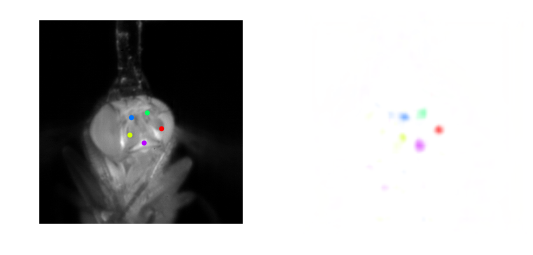

In [3]:
from scipy import io
_,valmovies = multiResData.getMovieLists(conf)
for ndx in [0,3]:
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
    pname = '/home/mayank/work/tensorflow/results/headResults/movies/' + oname + extrastr
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)

    predLocs = PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)
    io.savemat(pname + '.mat',{'locs':predLocs,'expname':valmovies[ndx]})


In [ ]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from stephenHeadConfig import conf as conf
from scipy import io


# conf = sideconf
# extrastr = '_side'
extrastr = ''
conf.batch_size = 1
conf.useMRF = True
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
batch_size doesnt match
Loading base variables from /home/mayank/work/tensorflow/cacheHead/headBase-5000
Parameters that dont match for mrf:
batch_size doesnt match
Loading mrf variables from /home/mayank/work/tensorflow/cacheHead/headMRF-1000


In [ ]:
self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[2,])
predLocs = np.zeros([numex,conf.n_classes,2,2])

self.val_cursor.first()
for count in range(numex):
    self.updateFeedDict(self.DBType.Val)
    curpred = sess.run([self.basePred,self.mrfPred],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    all_preds[count,:,:,:,1] = curpred[1]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = PoseTools.getBasePredLocs(curpred[1],conf)[0,:,:]



In [ ]:

# diff = (all_preds[:,:,:,:,0]-2*all_preds[:,:,:,:,1]-1)**2
diff = (predLocs[:,:,:,0]-predLocs[:,:,:,1])**2
dd = np.squeeze(np.apply_over_axes(np.sum,diff,[1,2]))
oo = dd.argsort()

print dd[oo[-4:-1]]
print dd[oo[:3]]
for ndx in range(1,4):
    curi = oo[-ndx]
    aa1 = PoseTools.createPredImage(all_preds[curi,:,:,:,0],conf.n_classes)
    aa2 = PoseTools.createPredImage(2*all_preds[curi,:,:,:,1]-1,conf.n_classes)
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(aa1)
    ax1.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(aa2)
    ax2.axis('off')
    plt.show()
